# Data Exploration

In [108]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

## Display Head

In [109]:
df.head(10)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
5,5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,47307.0,2.0 16V Twin Spark
6,6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110,150,Manual,Petrol,"8,8 l/100 km",210 g/km,230000.0,Quadrifoglio
7,7,alfa-romeo,Alfa Romeo 164,black,07/1996,1996,5500,132,179,Manual,Petrol,"13,4 l/100 km",320 g/km,168000.0,(3.0) V6 Super
8,8,alfa-romeo,Alfa Romeo Spider,black,07/1996,1996,8990,141,192,Manual,Petrol,11 l/100 km,265 g/km,168600.0,|HU:neu|Klimaanlage|Youngtimer|
9,9,alfa-romeo,Alfa Romeo Spider,black,01/1996,1996,6976,110,150,Manual,Petrol,"9,2 l/100 km",220 g/km,99000.0,2.0 T.Spark L *Klima *2.Hand *Zahnriemen


## Description of Data

In [110]:
print(df.describe())

          Unnamed: 0  mileage_in_km
count  251079.000000   2.509270e+05
mean   125539.000000   8.534002e+04
std     72480.408456   7.871706e+04
min         0.000000   0.000000e+00
25%     62769.500000   2.490400e+04
50%    125539.000000   6.750000e+04
75%    188308.500000   1.265000e+05
max    251078.000000   3.800000e+06


## Data Info

In [111]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

## Check for Nulls & Duplicates

### Check for Nulls

In [112]:
print(df.isnull().sum())


Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


### Check for Duplicates

In [113]:
print(df.duplicated().sum())

0


# Data Cleaning & Visualization

## Research Question 1

#### Removing Wrong Data Type

In [114]:
import pandas as pd

# 1) Remove any string from those attributes and leave the float

df["fuel_consumption_l_100km"] = pd.to_numeric(
    df["fuel_consumption_l_100km"].replace(regex=True, to_replace=r"[^0-9.]", value=""),
    errors="coerce",
)
df["power_kw"] = pd.to_numeric(
    df["power_kw"].replace(regex=True, to_replace=r"[^0-9.]", value=""), errors="coerce"
)

# 2) If there is only a string, replace with null

df["fuel_consumption_l_100km"] = pd.to_numeric(
    df["fuel_consumption_l_100km"], errors="coerce"
)
df["power_kw"] = pd.to_numeric(df["power_kw"], errors="coerce")

# 3) If there is a negative value, replace with 0

df["fuel_consumption_l_100km"] = df["fuel_consumption_l_100km"].apply(
    lambda x: max(x, 0) if pd.notnull(x) else x
)
df["power_kw"] = df["power_kw"].apply(lambda x: max(x, 0) if pd.notnull(x) else x)



#### Assign Data Types

In [115]:
#assign data types to columns
df['fuel_consumption_l_100km'] = df['fuel_consumption_l_100km'].astype('float64')
df['power_kw'] = df['power_kw'].astype('float64')
df['transmission_type'] = df['transmission_type'].astype('category')

In [116]:
df.isnull().sum()

Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      155
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26922
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64

##### Numerical Imputer for Columns to Impute

In [117]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

columns_to_impute = ["fuel_consumption_l_100km", "power_kw"]

# Create IterativeImputer
numerical_imputer = IterativeImputer(max_iter=10, random_state=0)
df[columns_to_impute] = numerical_imputer.fit_transform(df[columns_to_impute])

#Remove Unknown values from the transmission_type column
df = df[df.transmission_type != "Unknown"]

In [118]:
df.isnull().sum()

Unnamed: 0                    0
brand                         0
model                         0
color                       166
registration_date             4
year                          0
price_in_euro                 0
power_kw                      0
power_ps                    127
transmission_type             0
fuel_type                     0
fuel_consumption_l_100km      0
fuel_consumption_g_km         0
mileage_in_km               151
offer_description             1
dtype: int64

##### Handling Outliers

In [119]:
import pandas as pd
from scipy.stats import zscore

# Calculate Z-scores
df["power_kw_zscore"] = zscore(df["power_kw"])

# Set a threshold for Z-scores
zscore_threshold = 3
filtered_df = df[abs(df["power_kw_zscore"]) <= zscore_threshold]

# Define custom bins based on your requirements
custom_bins = [0, 50, 100, 150, 200, 2050]

# Discretize the "power_kw" column into categorical bins
filtered_df["power_kw_discretized"] = pd.cut(
    filtered_df["power_kw"], bins=custom_bins, labels=False
)

# Discretize the "fuel_consumption_l_100km" column
num_bins = 5
filtered_df["fuel_consumption_l_100km_discretized"] = pd.cut(
    filtered_df["fuel_consumption_l_100km"], bins=custom_bins, labels=False
)

C:\Users\Yahia\AppData\Local\Temp\ipykernel_2284\1884729908.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["power_kw_discretized"] = pd.cut(
C:\Users\Yahia\AppData\Local\Temp\ipykernel_2284\1884729908.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["fuel_consumption_l_100km_discretized"] = pd.cut(


##### Visualization

c:\Users\Yahia\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


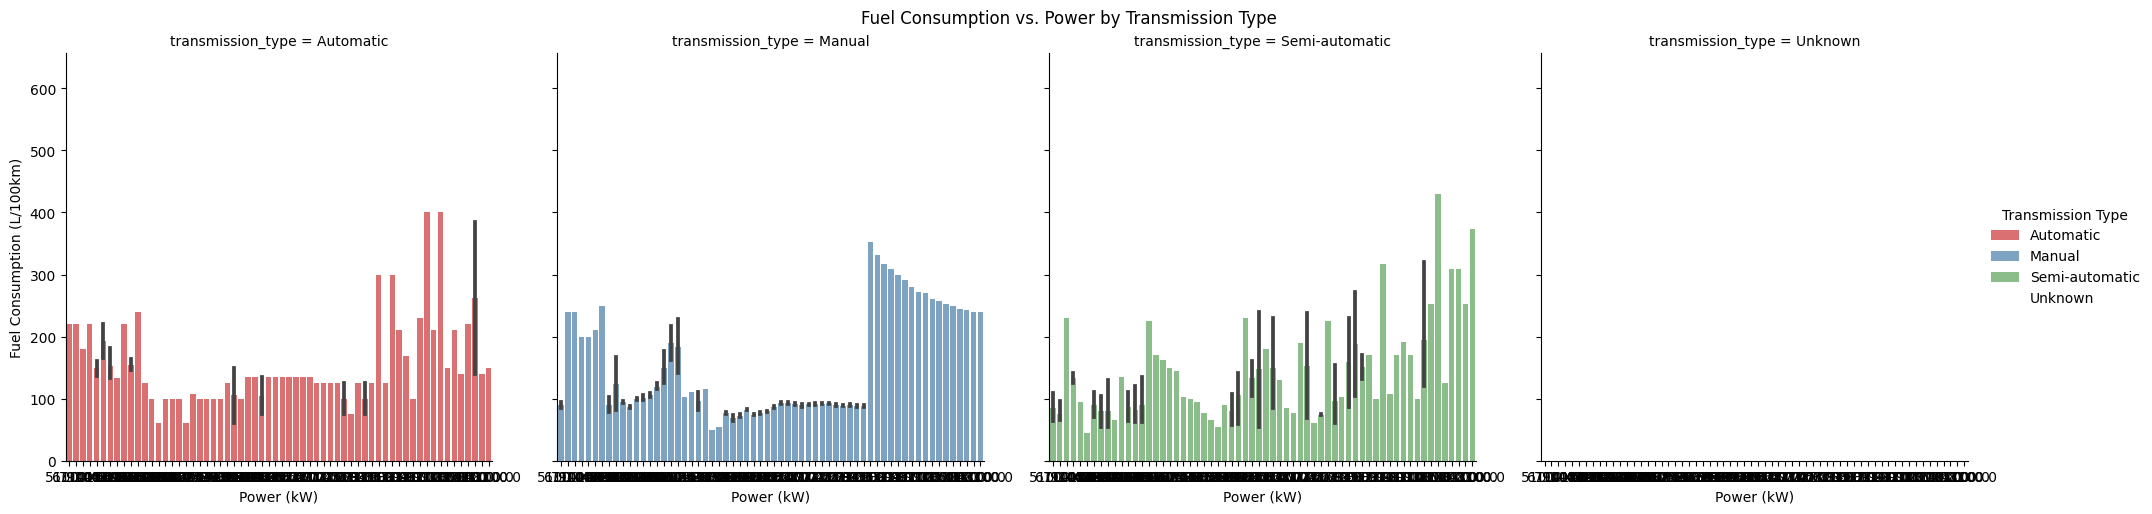

In [130]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid
g = sns.FacetGrid(
    filtered_df, col="transmission_type", hue="transmission_type", palette="Set1", height=5
)

# Scatter plot between power_kw and fuel_consumption_l_100km for each transmission type
g.map(sns.barplot, "fuel_consumption_l_100km", "power_kw", alpha=0.7)

# Set axis labels and title
g.set_axis_labels("Power (kW)", "Fuel Consumption (L/100km)")
g.fig.suptitle("Fuel Consumption vs. Power by Transmission Type", y=1.02)

# Add legend
g.add_legend(title="Transmission Type")

# Show the plot
plt.show()

## Research Question 1
##### How does the fuel efficiency (fuel consumption in liters per 100 kilometers) of German used cars in 2023 vary based on their transmission type and power (measured in kilowatts)?


###### Knowing the Fuel Efficiency Patterns of Used German Cars (2023) Regarding Transmission Types and Power Differences. We examine how power (measured in kilowatts) and transmission types interact in detail as we examine fuel economy in used German cars in 2023.

###### The correlation between power and fuel consumption appears to be negative, based on initial observations. That means that cars with more power could use less petrol, which could indicate that engine efficiency and design have been optimised. The complex interaction between engine characteristics and the relationship's details is highlighted by this correlation.

###### Fuel Consumption and Transmission Type Relationship: Upon a closer look, an exciting relationship between transmission types is revealed. In comparison to manual transmissions, automatic transmissions typically have a slightly greater fuel consumption. The trend could have an effect on overall fuel efficiency because of the natural power requirements of automatic transmissions. Manual transmissions, on the other hand, provide drivers more control over changing gears, which may result in improved fuel efficiency. Interestingly, semi-automatic transmissions show encouraging outcomes that relate to an equilibrium between efficiency and control.




## Research question 2

#### Removing Wrong Data Type

In [121]:
df["price_in_euro"] = pd.to_numeric(
    df["price_in_euro"].replace(regex=True, to_replace=r"[^0-9.]", value=""),
    errors="coerce",
)
df["price_in_euro"] = pd.to_numeric(df["price_in_euro"], errors="coerce")
df["price_in_euro"] = df["price_in_euro"].apply(
    lambda x: max(x, 0) if pd.notnull(x) else x
)

In [122]:
df.isnull().sum()

Unnamed: 0                    0
brand                         0
model                         0
color                       166
registration_date             4
year                          0
price_in_euro               165
power_kw                      0
power_ps                    127
transmission_type             0
fuel_type                     0
fuel_consumption_l_100km      0
fuel_consumption_g_km         0
mileage_in_km               151
offer_description             1
power_kw_zscore               0
dtype: int64

#### Handling Missing Values

In [123]:
columns_to_impute2 = ['price_in_euro']

df[columns_to_impute2] = numerical_imputer.fit_transform(df[columns_to_impute2])


In [124]:
df.isnull().sum()

Unnamed: 0                    0
brand                         0
model                         0
color                       166
registration_date             4
year                          0
price_in_euro                 0
power_kw                      0
power_ps                    127
transmission_type             0
fuel_type                     0
fuel_consumption_l_100km      0
fuel_consumption_g_km         0
mileage_in_km               151
offer_description             1
power_kw_zscore               0
dtype: int64

##### Fuel Column Adjustment

In [125]:
# remove any non string values from fuel_type column
df["fuel_type"] = df["fuel_type"].replace(regex=True, to_replace=r"[^a-zA-Z]", value="")
# Only include Petrol , Diesel ,Hybrid and Electric
df = df[df.fuel_type.isin(["Petrol", "Diesel", "Hybrid", "Electric"])]

##### Brand Column Adjustment

In [126]:
# 5 most used car brands
top_5_brands = df["brand"].value_counts().head(5).index.tolist()

# use them only for the top 5
df = df[df.brand.isin(top_5_brands)]

##### Handling Outliers & Discretization

In [127]:
df["price_in_euro_zscore"] = zscore(df["price_in_euro"])

filtered_df = df[abs(df["price_in_euro_zscore"]) <= zscore_threshold]

# Calculate mean and standard deviation of price_in_euro
mean_price = filtered_df["price_in_euro"].mean()
std_price = filtered_df["price_in_euro"].std()

# Define custom price ranges using mean and standard deviation
price_ranges = [
    mean_price - 2 * std_price,
    mean_price - std_price,
    mean_price,
    mean_price + std_price,
    mean_price + 2 * std_price,
    float("inf"),
]
labels = list(range(len(price_ranges) - 1))

# Discretize the filtered price_in_euro column with custom ranges
filtered_df["price_in_euro_discretized"] = pd.cut(
    filtered_df["price_in_euro"], bins=price_ranges, labels=labels
)

C:\Users\Yahia\AppData\Local\Temp\ipykernel_2284\4180917818.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["price_in_euro_discretized"] = pd.cut(


##### Visualization

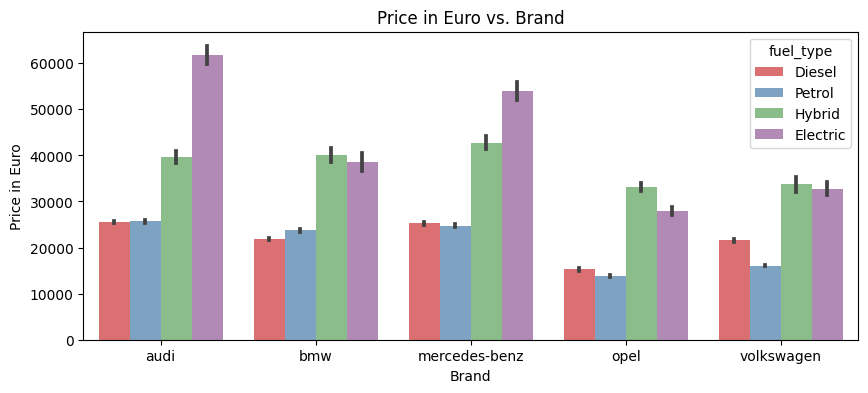

In [132]:
# Bar Chart plot between price_in_euro and brand
plt.figure(figsize=(10, 4))
sns.barplot(
    data=filtered_df,
    x="brand",
    y="price_in_euro",
    hue="fuel_type",
    palette="Set1",
    alpha=0.7,
)
plt.xlabel("Brand")
plt.ylabel("Price in Euro")
plt.title("Price in Euro vs. Brand")
plt.show()

## Research Question 2: 
#### Examining Price Differences Among the Top 5 Brands and Different Fuel Types for German Used Cars in 2023

###### Through our research, we want to identify significant variations in German used car costs in 2023. We will be concentrating on the top 5 most popular brands and their corresponding fuel types.

###### An early visualization provides fascinating new information. The pricing trends for the different gasoline types are very interesting. When it comes to pricing, electric and hybrid cars are usually more expensive than their petrol and diesel equivalents. The result highlights the significant impact that fuel type has on the overall dynamics of used car prices in the German market.

###### Additional analysis of brand-specific pricing indicates the impact of brand on market values. In 2023, Audi is the brand with the highest average used car costs, followed by Mercedes, BMW, and Opel and Volkswagen, which have roughly comparable price ranges. This rating highlights the important significance that the brand itself plays in determining the used car pricing range.